# Draw schematic diagram for discrete cracks and phase field model

## Discrete crack

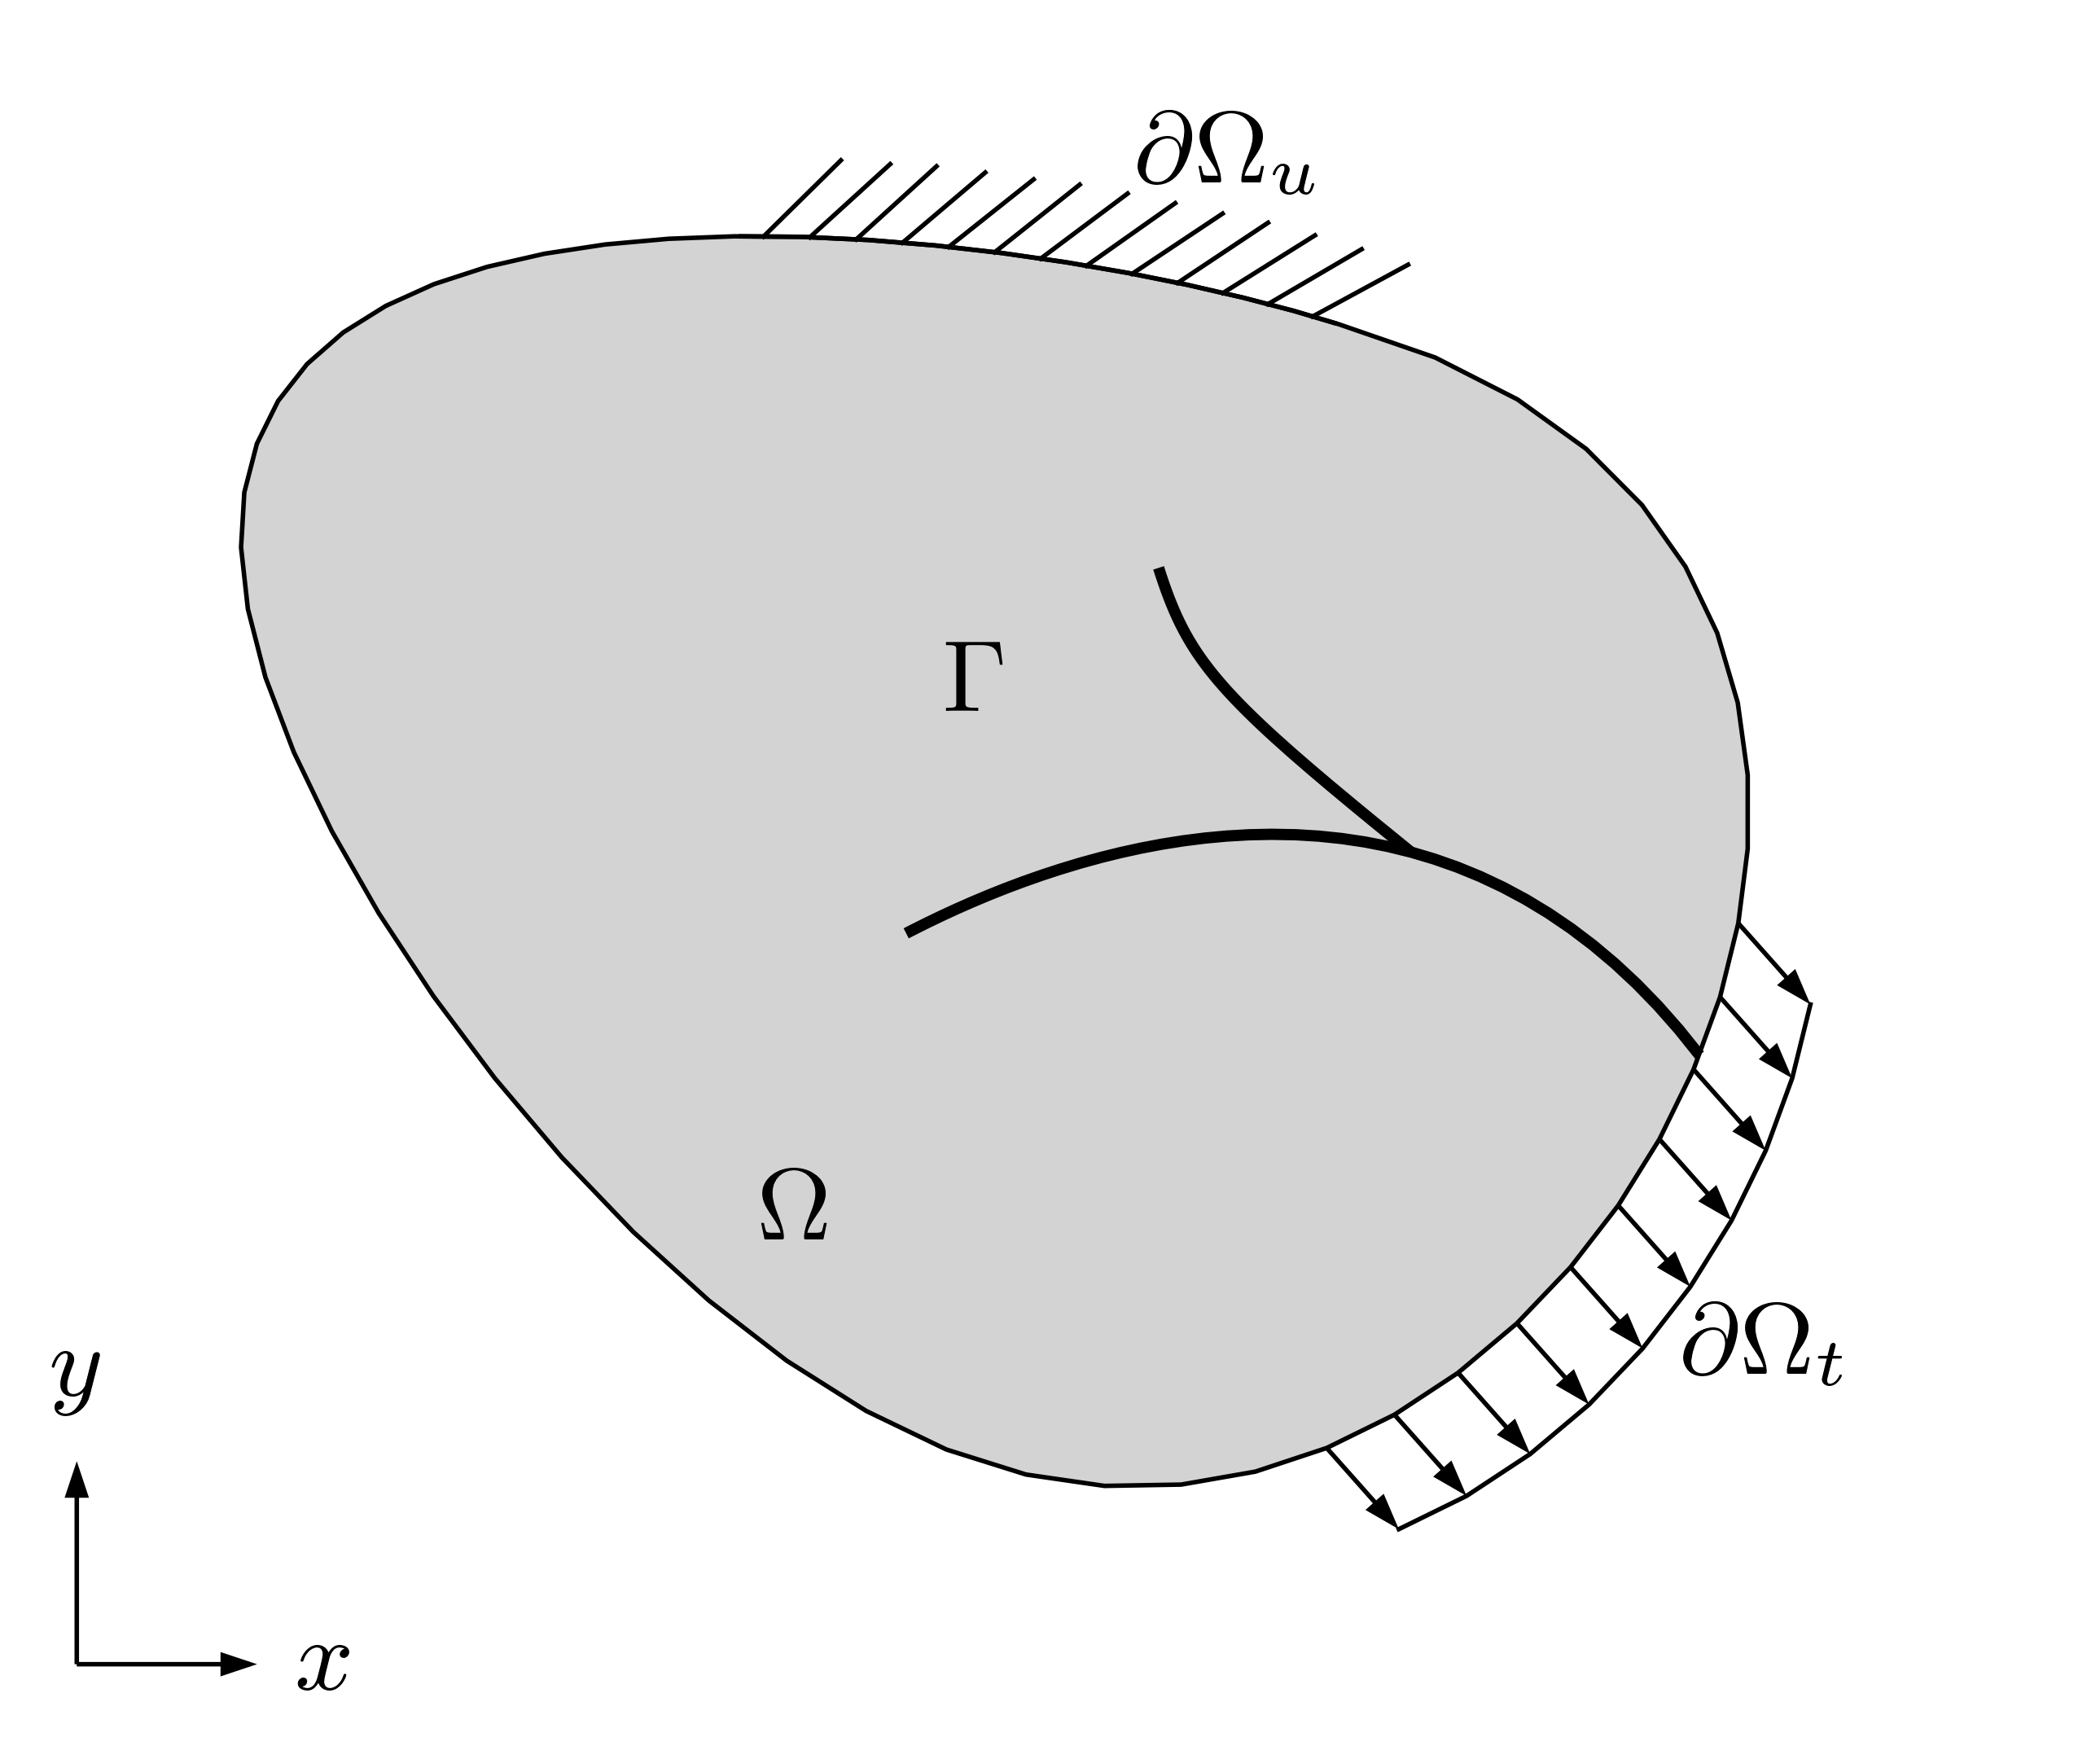

In [1]:
from cm_vis.scheme.basic import Scheme
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("../misc/fem.mplstyle")
fig, ax = plt.subplots()
ax.set(xlim=[-3.6, 2], ylim=[-2.6, 1.5])

# draw a potato
verts = np.array([[0, 0.8], [1, -1], [-1, -2], [-3, 0], [-2, 1]])
scheme = Scheme(ax, lw=0.4)
outer_path = scheme.add_pathpatch(verts, curve=True, closed=True, fc='lightgrey')
scheme.add_text(-1.5, -1.5, "$\Omega$")
scheme.add_coord_axis(origin=np.array([-3.5, -2.5]), length=np.array([0.5, 0.5]),
                      offset=0.02)

# add discrete crack
crack1 = np.array([[1, -1], [0.2, -0.5], [-0.6, -0.5], [-1.2, -0.7]])
crack2 = np.array([[0.2, -0.5], [-0.2, -0.2], [-0.4, 0], [-0.5, 0.2]])
scheme.add_pathpatch(crack1, curve=True, closed=False, fc='None', lw=1)
scheme.add_pathpatch(crack2, curve=True, closed=False, fc='None', lw=1)
scheme.add_text(-1, -0.2, "$\Gamma$")

# add boundaries
outer = outer_path.vertices
bnd_u = outer[-100:-1, :] # define displacement boundary
scheme.add_fix_bc(bnd_u, scale=1.5, spacing=4)
scheme.add_text(-0.3, 1.1, "$\partial\Omega_u$")

bnd_t = outer[100:200, :] # define traction boundary
bcs = np.zeros_like(bnd_t)
bcs[:, 0] = 1
bcs[:, 1] = -1
scheme.add_dist_bc(bnd_t, bcs, scale=0.2, interval=10,
                   text="$\partial\Omega_{t}$", textloc="right", offset=0.02)


## Phase field model

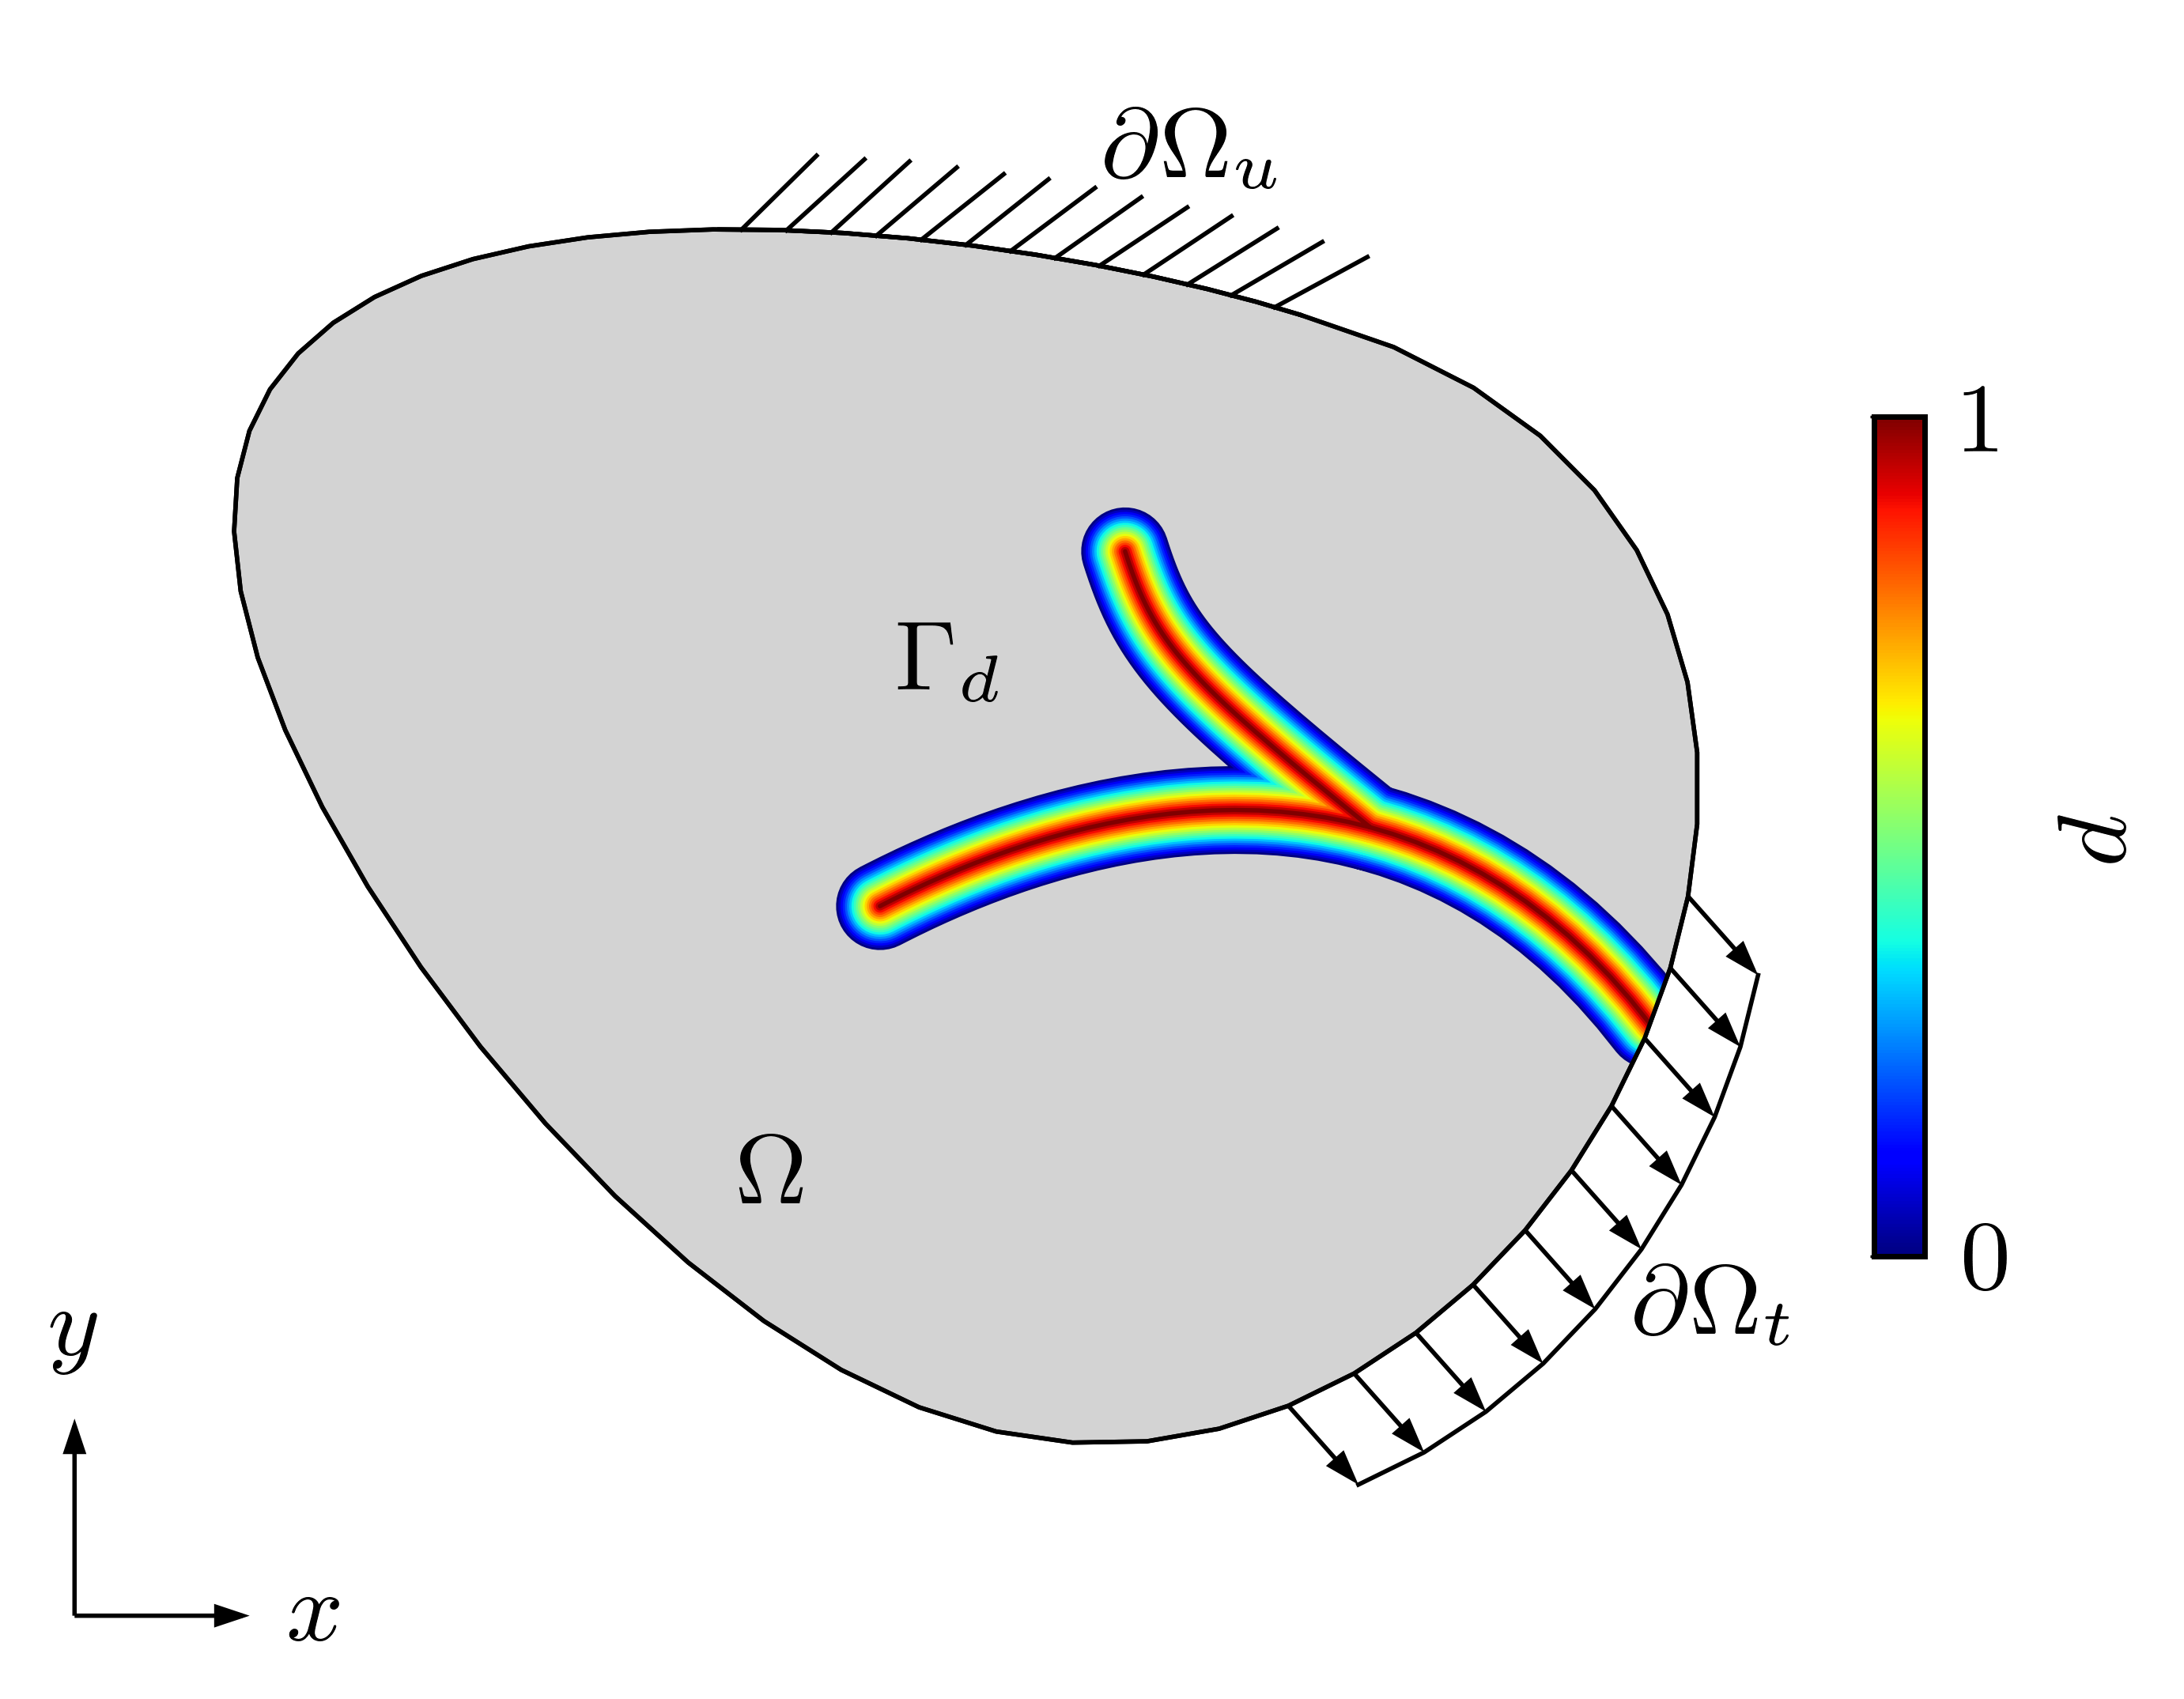

In [1]:
from cm_vis.scheme.phasefield import PFScheme
from cm_vis.scheme.colors import CMColormap
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.style.use("../misc/fem.mplstyle")
fig, ax = plt.subplots()
ax.set(xlim=[-3.6, 2], ylim=[-2.6, 1.5])

scheme = PFScheme(ax, lw=0.4)

# draw a potato
verts = np.array([[0, 0.8], [1, -1], [-1, -2], [-3, 0], [-2, 1]])
outer_path = scheme.add_pathpatch(verts, curve=True, closed=True, fc='lightgrey')
scheme.add_text(-1.5, -1.5, "$\Omega$")
scheme.add_coord_axis(origin=np.array([-3.5, -2.5]), length=np.array([0.5, 0.5]),
                      offset=0.02)
scheme.add_text(-1, -0.2, "$\Gamma_d$")

# define crack set
crack1 = np.array([[1, -1], [0.2, -0.5], [-0.6, -0.5], [-1.2, -0.7]])
crack2 = np.array([[0.2, -0.5], [-0.2, -0.2], [-0.4, 0], [-0.5, 0.2]])
crack_path1 = scheme.add_pathpatch(crack1, curve=True, draw=False)
crack_path2 = scheme.add_pathpatch(crack2, curve=True, draw=False)

# draw phase field
# my_cm = CMColormap(["lightgrey", "k"], [0, 1])
my_cm = CMColormap(clim=[0, 1], cmap=cm.jet)
crack_set_path = scheme.add_phasefield([crack_path1, crack_path2], 8, 
                                       my_cm.get_cmap(), 
                                       domain=outer_path)

# add boundaries
outer = outer_path.vertices
bnd_u = outer[-100:-1, :] # define displacement boundary
scheme.add_fix_bc(bnd_u, scale=1.5, spacing=4)
scheme.add_text(-0.3, 1.1, "$\partial\Omega_u$")

bnd_t = outer[100:200, :] # define traction boundary
bcs = np.zeros_like(bnd_t)
bcs[:, 0] = 1
bcs[:, 1] = -1
scheme.add_dist_bc(bnd_t, bcs, scale=0.2, interval=10,
                   text="$\partial\Omega_{t}$", textloc="right", offset=0.02)

# add colorbar
cax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
cax.set_title("$d$")
cbar = my_cm.add_colorbar(cax, orientation='vertical')
cbar.set_ticks([0, 1])